<a href="https://colab.research.google.com/github/mohitsaini65/Cotton-Plant-Disease-Prediction/blob/main/Cotton_Plant_Disease_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = "/content/drive/MyDrive/Colab Notebooks/Cotton-Plant-Disease-Dataset/data/train"
test_path  = "/content/drive/MyDrive/Colab Notebooks/Cotton-Plant-Disease-Dataset/data/test"

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)


In [ ]:
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [ ]:
model_cnn = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(4, activation="softmax")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_cnn.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history_cnn = model_cnn.fit(
    train_data,
    validation_data=test_data,
    epochs=5
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 522s 8s/step - accuracy: 0.3732 - loss: 1.6133 - val_accuracy: 0.5000 - val_loss: 1.1335
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.5158 - loss: 1.0627 - val_accuracy: 0.5556 - val_loss: 0.8037
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 252s 4s/step - accuracy: 0.5978 - loss: 0.9749 - val_accuracy: 0.8889 - val_loss: 0.6872
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 276s 4s/step - accuracy: 0.6173 - loss: 0.9320 - val_accuracy: 0.8333 - val_loss: 0.5806
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 250s 4s/step - accuracy: 0.6891 - loss: 0.8203 - val_accuracy: 0.7778 - val_loss: 0.5977


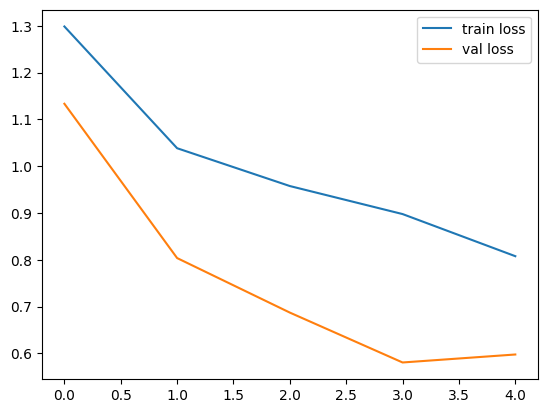

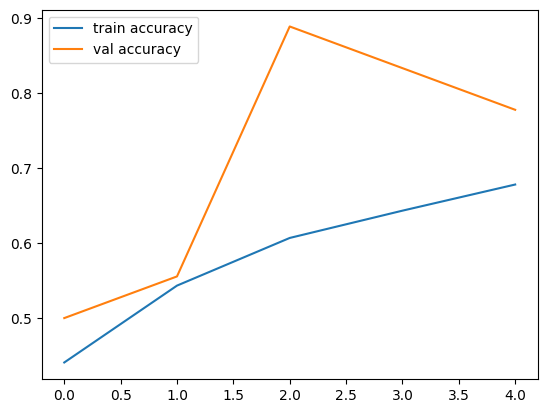

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history["loss"], label="train loss")
plt.plot(history_cnn.history["val_loss"], label="val loss")
plt.legend()
plt.show()

plt.plot(history_cnn.history["accuracy"], label="train accuracy")
plt.plot(history_cnn.history["val_accuracy"], label="val accuracy")
plt.legend()
plt.show()


In [ ]:
model_cnn.save("/content/drive/MyDrive/custom_cnn_cotton.h5")

In [ ]:
class_indices = train_data.class_indices
labels = dict((v, k) for k, v in class_indices.items())
labels

{0: 'diseased cotton leaf',
 1: 'diseased cotton plant',
 2: 'fresh cotton leaf',
 3: 'fresh cotton plant'}